# CS:GO Economy Simulation


$$ \text{force_rate} = \frac{\text{Cost of Vest}}{\text{Starting Money}} $$ 

$$ \text{ct_odds} = \frac{\text{CT money invested}}{\text{CT money invested} + \text{t_lean}*\text{T money invest}} $$


### Imports and Variable Initialization

In [54]:
import importlib
import CS_EcoAnalyzer as cs
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
#!\usr\bin\python


market = {'AWP': 4750,
          'AK47': 2700,
          'M4A4': 3100,
          'M4A1': 2900,
          'Famas': 2050,
          'Galil': 1800,
          'Scout': 1700, 
          'Mag7': 1300, 
          'MP9': 1250,
          'Mac10': 1050,
          'Deagle': 700,
          'P250': 300,
          'Vesthelm': 1000,
          'Vest': 650,
          'Smoke': 300,
          'Flash': 200,
          'Molly': 400,
          'HE': 300,
          'Incendiary': 600,
          'DefuseKit': 400
         }
          

full_util_CT = market['Vesthelm'] + market['Smoke'] + market['Incendiary'] + market['Flash'] + market['HE'] + market['DefuseKit']
even_util_CT = market['Vest'] + market['Smoke'] + market['Incendiary'] + market['Flash'] + market['DefuseKit']
light_util_CT = market['Vest'] + market['Smoke'] +  market['Flash']*2 +  market['DefuseKit'] 

ct_max_buy = market['AWP']*2 + market['M4A4']*3 + full_util_CT*5 - (market['Vesthelm']-market['Vest'])*2
ct_even_buy =  market['AWP']*1 + market['M4A4']*4 + even_util_CT*5 - market['DefuseKit']*2
ct_min_buy = market['M4A1']*2 + market['Famas']*2 + market['MP9'] + light_util_CT*5  - market['DefuseKit']*3 + market['Incendiary']*3 

full_util_T = market['Vesthelm']+market['Smoke']+market['Molly']+market['Flash']*2
t_max_buy =  market['AWP']*1 + market['AK47']*4 + full_util_T*5
t_even_buy = market['AK47']*5 + full_util_T*5
t_min_buy = market['AK47']*2 + market['Galil']*2 + market['Deagle'] + full_util_T*4 - market['Molly']*2

t_win_lean = ct_even_buy/t_even_buy
t_plant_lean = ct_max_buy/t_min_buy

ct_buy_levels = [ct_max_buy/5, ct_even_buy/5, ct_min_buy/5]
t_buy_levels = [t_max_buy/5, t_even_buy/5, t_min_buy/5]

starting_money = 800
starting_loss = 1
force_percent = market['Vest']/starting_money
liverate_kill = (market['AWP']+market['AK47']+market['Vest']*2+market['DefuseKit']+market['Flash']*2)/ct_even_buy
liverate_obj= (market['AWP']+market['Vest']+market['DefuseKit']+market['Flash'])/ct_even_buy
liverate_save = (market['AWP']+market['M4A4']*3 + market['Vest']*4+full_util_CT)/ct_even_buy


eco_rules = {'starting_mny': starting_money,
             'starting_loss': starting_loss,
             'win_reward_kill': 3250,
             'win_reward_obj': 3500,
             'loss_reward': 1400,
             'loss_increment': 500,
             'kill_reward': 300,
             'plant_reward': 800,
             'max_mny': 16000,
             'max_loss': 5,
             'MR': 15,
             'market': market,
             'ct_bl': ct_buy_levels, 
             't_bl': t_buy_levels,
             'force_rate': force_percent,
             't_win_lean': t_win_lean,
             't_plant_lean': t_plant_lean,
             'win_LR_kill': liverate_kill,
             'win_LR_obj': liverate_obj,
             'win_LR_save':liverate_save,
            # NO IDEA about these values, pure guesswork
             'save_returnrate': 1/5,
             'save_multiplier': 1, #not called in code, currently default to 1

            }
            
starting_gamestate = {'ct_mny': eco_rules['starting_mny'],
                    'ct_loss':eco_rules['starting_loss'],
                    't_mny':eco_rules['starting_mny'],
                    't_loss':eco_rules['starting_loss'],
                    't_wins':0,
                    'rnds_played':0
                   }  

In [62]:
ct_odds = 0.4797789037309995

plant_odds = 0.3649169840060929

print((eco_rules['t_win_lean']*ct_odds)-plant_odds)

print(1-(plant_odds/eco_rules['t_win_lean']))

0.17683336145682743
0.6768262872270764


#### Simulating a single half and outputting the results of each round

In [71]:
importlib.reload(cs)

n_of_1 = cs.half_simulator(eco_rules, starting_gamestate, 1)

for i in range(eco_rules['MR']):
    print("Round ", i, "- \n", n_of_1[0][i], "\n")

Round  0 - 
 {'winner': 'CT', 'event': 'bomb_plant_force', 'CT_mnyinvest': 650.0, 'CT_buyoption': 'F', 'T_mnyinvest': 650.0, 'T_buyoption': 'F', 'gamestate': {'ct_mny': 4094.0, 'ct_loss': 0, 't_mny': 3650.0, 't_loss': 2, 't_wins': 0, 'rnds_played': 1}} 

Round  1 - 
 {'winner': 'T', 'event': 'none', 'CT_mnyinvest': 0, 'CT_buyoption': 'S', 'T_mnyinvest': 3460.0, 'T_buyoption': 'B', 'gamestate': {'ct_mny': 5994.0, 'ct_loss': 1, 't_mny': 4959.0, 't_loss': 1, 't_wins': 1, 'rnds_played': 2}} 

Round  2 - 
 {'winner': 'T', 'event': 'bomb_plant', 'CT_mnyinvest': 5420.0, 'CT_buyoption': 'B', 'T_mnyinvest': 4800.0, 'T_buyoption': 'B', 'gamestate': {'ct_mny': 4058.0, 'ct_loss': 2, 't_mny': 5022.0, 't_loss': 0, 't_wins': 2, 'rnds_played': 3}} 

Round  3 - 
 {'winner': 'T', 'event': 'none', 'CT_mnyinvest': 0, 'CT_buyoption': 'S', 'T_mnyinvest': 4800.0, 'T_buyoption': 'B', 'gamestate': {'ct_mny': 6958.0, 'ct_loss': 3, 't_mny': 5464.0, 't_loss': 0, 't_wins': 3, 'rnds_played': 4}} 

Round  4 - 
 {'wi

In [72]:
(pd.DataFrame(n_of_1[0]))

,winner,event,CT_mnyinvest,CT_buyoption,T_mnyinvest,T_buyoption,gamestate
0,CT,bomb_plant_force,650.0,F,650.0,F,"{'ct_mny': 4094.0, 'ct_loss': 0, 't_mny': 3650..."
1,T,none,0.0,S,3460.0,B,"{'ct_mny': 5994.0, 'ct_loss': 1, 't_mny': 4959..."
2,T,bomb_plant,5420.0,B,4800.0,B,"{'ct_mny': 4058.0, 'ct_loss': 2, 't_mny': 5022..."
3,T,none,0.0,S,4800.0,B,"{'ct_mny': 6958.0, 'ct_loss': 3, 't_mny': 5464..."
4,CT,none,6420.0,B,5210.0,B,"{'ct_mny': 6350.0, 'ct_loss': 2, 't_mny': 2354..."
5,CT,none,5420.0,B,0.0,S,"{'ct_mny': 8370.0, 'ct_loss': 1, 't_mny': 4754..."
6,T,bomb_plant,6420.0,B,3460.0,B,"{'ct_mny': 5634.0, 'ct_loss': 2, 't_mny': 5860..."
7,T,bomb_plant,5420.0,B,5210.0,B,"{'ct_mny': 4198.0, 'ct_loss': 3, 't_mny': 5604..."
8,T,none,4100.0,B,5210.0,B,"{'ct_mny': 3498.0, 'ct_loss': 4, 't_mny': 5780..."
9,T,none,0.0,S,5210.0,B,"{'ct_mny': 7398.0, 'ct_loss': 5, 't_mny': 5956..."


## Large-Scale Simulation

#### n = 10,000
#### Light Visualization Included

In [65]:
n = 1000
simulation = cs.half_simulator(eco_rules, starting_gamestate, n)

pistol_results = []
half_results = []
round_results = []

for i in range(n):
    pistol_results.append(simulation[i][0]['winner'] + " " + simulation[i][0]['event'])
    half_results.append(simulation[i][-1]['gamestate']['t_wins'])
    
    
for j in range(eco_rules['MR']):
        round_results.append([simulation[i][j]['winner'] for i in range(n)])

(array([209.,   0.,   0., 338.,   0.,   0., 351.,   0.,   0., 102.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

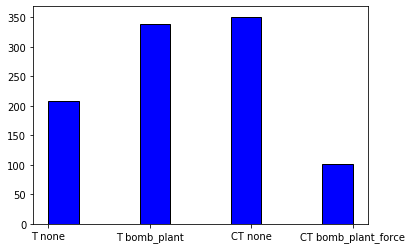

In [66]:
plt.hist(pistol_results, color = 'blue', edgecolor = 'black')

(array([  6.,  14.,  62., 131., 213., 232., 160., 108.,  45.,  29.]),
 array([ 2. ,  3.1,  4.2,  5.3,  6.4,  7.5,  8.6,  9.7, 10.8, 11.9, 13. ]),
 <a list of 10 Patch objects>)

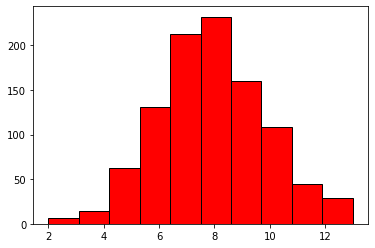

In [67]:
plt.hist(half_results, color = 'red', edgecolor = 'black')

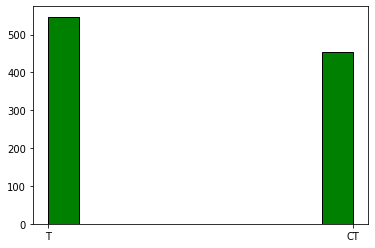

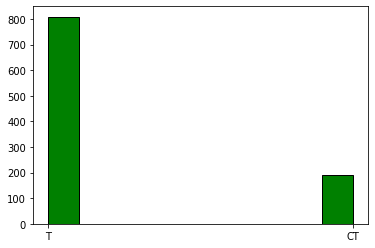

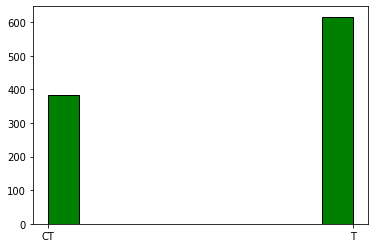

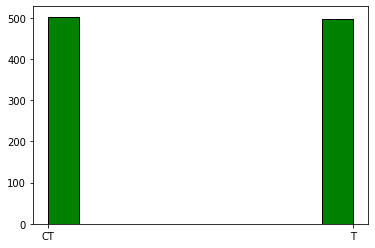

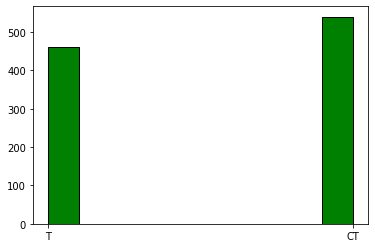

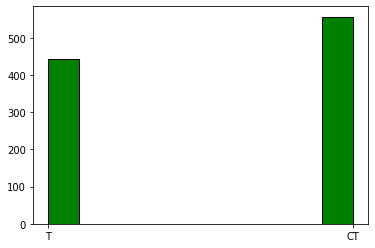

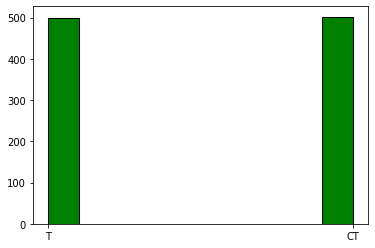

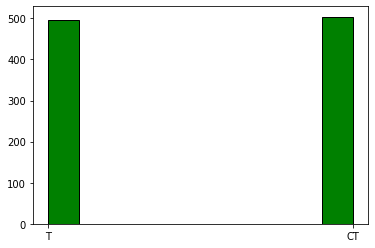

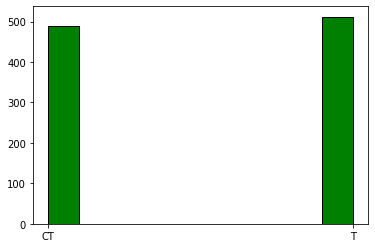

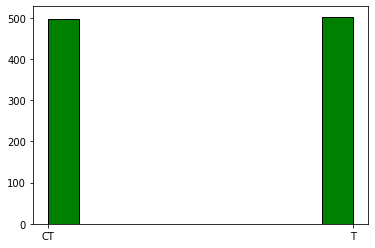

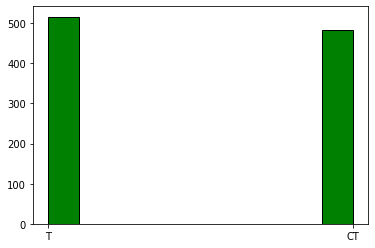

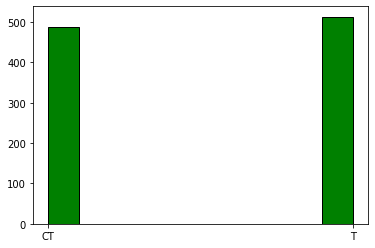

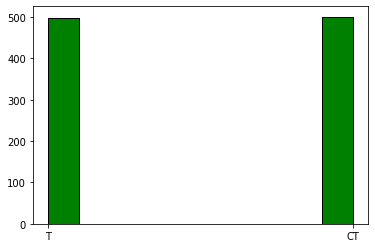

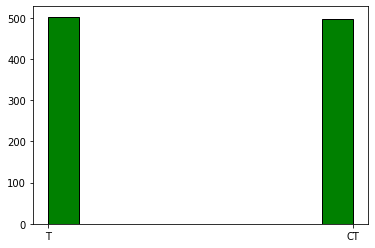

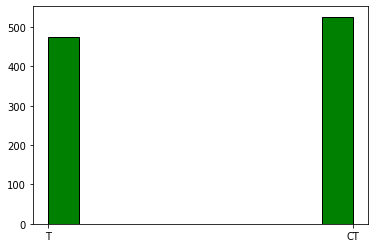

In [68]:
for k in range(eco_rules['MR']):
    plt.hist(round_results[k], color = 'green', edgecolor = 'black', stacked=False)
    plt.show()
